In [1]:
from datetime import datetime
import pandas as pd 
from pycaret.classification import * 
from pycaret.datasets import get_data

In [2]:
df_train = pd.read_csv('Data/otto_group_Product_train.csv')

In [3]:
df_train = df_train.drop(['id'],axis=1)

In [4]:
df_train.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50,feat_51,feat_52,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,1,0,4,1,1,0,0,2,0,0,0,0,0,1,0,0,0,0,1,0,5,0,0,0,0,0,2,0,0,0,0,0,1,0,0,2,0,0,11,0,1,1,0,1,0,7,0,0,0,1,0,0,0,0,0,0,0,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,Class_1
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Class_1
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,6,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Class_1
3,1,0,0,1,6,1,5,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,7,2,2,0,0,0,58,0,10,0,0,0,0,0,3,0,0,0,0,0,2,0,2,0,1,2,1,3,0,0,3,1,0,0,0,0,0,0,0,0,0,2,1,5,0,0,4,0,0,2,1,0,1,0,0,1,1,2,2,0,22,0,1,2,0,0,0,0,0,0,Class_1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,3,0,0,0,0,0,0,0,4,0,1,0,0,0,1,0,0,0,0,1,0,0,0,Class_1


### Remove correlated features

In [29]:
X = df_train.drop(['target'],axis=1)

#### Identify Highly Correlated Features

In [30]:
# Create correlation matrix
corr_matrix = X.corr().abs()
print(); print(corr_matrix)


           feat_1    feat_2    feat_3        feat_4    feat_5    feat_6  \
feat_1   1.000000  0.031332  0.027807  2.752941e-02  0.042973  0.043603   
feat_2   0.031332  1.000000  0.082573  1.349870e-01  0.020926  0.041343   
feat_3   0.027807  0.082573  1.000000  5.835232e-01  0.010880  0.004288   
feat_4   0.027529  0.134987  0.583523  1.000000e+00  0.017290  0.014059   
feat_5   0.042973  0.020926  0.010880  1.729026e-02  1.000000  0.145355   
feat_6   0.043603  0.041343  0.004288  1.405895e-02  0.145355  1.000000   
feat_7   0.298952  0.222386  0.001294  1.448981e-02  0.075047  0.088014   
feat_8   0.056321  0.019815  0.053462  4.618407e-02  0.035861  0.012867   
feat_9   0.032285  0.025630  0.063551  4.624977e-02  0.024708  0.009373   
feat_10  0.097776  0.051925  0.036944  5.951396e-02  0.091324  0.041940   
feat_11  0.042928  0.118534  0.596243  3.894092e-01  0.004882  0.014504   
feat_12  0.056934  0.090153  0.050037  5.743356e-02  0.036668  0.028588   
feat_13  0.139254  0.157

In [31]:
# Select upper triangle of correlation matrix
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
print(); print(upper_tri)


         feat_1    feat_2    feat_3    feat_4    feat_5    feat_6    feat_7  \
feat_1      NaN  0.031332  0.027807  0.027529  0.042973  0.043603  0.298952   
feat_2      NaN       NaN  0.082573  0.134987  0.020926  0.041343  0.222386   
feat_3      NaN       NaN       NaN  0.583523  0.010880  0.004288  0.001294   
feat_4      NaN       NaN       NaN       NaN  0.017290  0.014059  0.014490   
feat_5      NaN       NaN       NaN       NaN       NaN  0.145355  0.075047   
feat_6      NaN       NaN       NaN       NaN       NaN       NaN  0.088014   
feat_7      NaN       NaN       NaN       NaN       NaN       NaN       NaN   
feat_8      NaN       NaN       NaN       NaN       NaN       NaN       NaN   
feat_9      NaN       NaN       NaN       NaN       NaN       NaN       NaN   
feat_10     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
feat_11     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
feat_12     NaN       NaN       NaN       NaN      

In [32]:
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.80)]

In [33]:
print(to_drop)

['feat_45']


In [34]:
len(to_drop)

1

#### Drop Marked Features

In [35]:
# Drop features 
if len(to_drop) > 0:
    df_train = df_train.drop(df_train[to_drop], axis=1)
    print (df_train.head())

   feat_1  feat_2  feat_3  feat_4  feat_5  feat_6  feat_7  feat_8  feat_9  \
0       1       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       1       0   
2       0       0       0       0       0       0       0       1       0   
3       1       0       0       1       6       1       5       0       0   
4       0       0       0       0       0       0       0       0       0   

   feat_10  feat_11  feat_12  feat_13  feat_14  feat_15  feat_16  feat_17  \
0        0        1        0        0        0        0        0        2   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        1   
3        1        1        0        1        0        0        1        1   
4        0        0        0        0        0        0        0        4   

   feat_18  feat_19  feat_20  feat_21  feat_22  feat_23  feat_24  feat_25 

### PyCaret Setup

In [37]:
init_time = datetime.now()
print (f"Job Started at: {init_time}")
#fold_strategy = 'kfold' Default = 'stratifiedkfold'
clf = setup(data = df_train, target = 'target', session_id=123,
            data_split_stratify = True,
            normalize = True, 
            normalize_method = 'minmax',
            transformation = True, 
            transformation_method = 'quantile',
            pca = True,
            pca_method = 'incremental',
            #feature_selection = True,
            #feature_selection_threshold = 0.5,
            #feature_selection_method = 'boruta',
            remove_outliers = True,
            outliers_threshold = 0.05,
            fix_imbalance = True
           )
fin_time = datetime.now()
print("Execution time : ", (fin_time-init_time))
print (f"Job Ended at: {fin_time}")

,Description,Value
0,session_id,123
1,Target,target
2,Target Type,Multiclass
3,Label Encoded,"Class_1: 0, Class_2: 1, Class_3: 2, Class_4: 3, Class_5: 4, Class_6: 5, Class_7: 6, Class_8: 7, Class_9: 8"
4,Original Data,"(61878, 93)"
5,Missing Values,False
6,Numeric Features,82
7,Categorical Features,10
8,Ordinal Features,False
9,High Cardinality Features,False


Execution time :  0:00:24.594763
Job Ended at: 2020-11-13 21:32:52.807448


### Finding optimal model

In [ ]:
init_time = datetime.now()
print (f"Job Started at: {init_time}")
#top3_models = compare_models(n_select = 3)
best = compare_models()
fin_time = datetime.now()
print("Execution time : ", (fin_time-init_time))
print (f"Job Ended at: {fin_time}")

Job Started at: 2020-11-13 21:33:16.794172


IntProgress(value=0, description='Processing: ', max=79)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:33:16
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Gradient Boosting Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7421,0.9499,0.6904,0.7412,0.7410,0.6895,0.6896,36.6140
knn,K Neighbors Classifier,0.6882,0.8972,0.6967,0.7407,0.7029,0.6339,0.6382,28.2520
lr,Logistic Regression,0.6424,0.9331,0.6509,0.6992,0.6582,0.5815,0.5860,18.2460
qda,Quadratic Discriminant Analysis,0.6355,0.9327,0.6288,0.6983,0.6526,0.5732,0.5797,8.7550
ridge,Ridge Classifier,0.5986,0.0000,0.6046,0.6620,0.6067,0.5344,0.5423,6.7650
svm,SVM - Linear Kernel,0.5901,0.0000,0.6017,0.6648,0.6046,0.5238,0.5320,9.7930
nb,Naive Bayes,0.5775,0.9005,0.5746,0.6443,0.5954,0.5081,0.5138,7.7730
dt,Decision Tree Classifier,0.5718,0.7528,0.5279,0.6085,0.5858,0.4936,0.4951,12.0510
ada,Ada Boost Classifier,0.5438,0.8788,0.5522,0.6268,0.5646,0.4725,0.4803,20.9490


In [7]:
init_time = datetime.now()
print (f"Job Started at: {init_time}")
best_model = finalize_model(best)
fin_time = datetime.now()
print("Execution time : ", (fin_time-init_time))
print (f"Job Ended at: {fin_time}")

Job Started at: 2020-11-12 20:35:10.135452
Execution time :  0:05:17.129745
Job Ended at: 2020-11-12 20:40:27.265197


In [8]:
print (best_model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


In [27]:
#best = compare_models()
#lgb = create_model('lightgbm')

### Tune Model

In [9]:
init_time = datetime.now()
print (f"Job Started at: {init_time}")
#tuned_model = tune_model(best_model, optimize = 'AUC') # 'Recall'
tuned_model = tune_model(best_model, optimize = 'F1')
print(tuned_model)
fin_time = datetime.now()
print("Execution time : ", (fin_time-init_time))
print (f"Job Ended at: {fin_time}")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6519,0.9251,0.6325,0.6725,0.6534,0.5874,0.5899
1,0.6734,0.9285,0.6452,0.6966,0.6771,0.6123,0.6145
2,0.6717,0.9280,0.6338,0.6921,0.6752,0.6100,0.6117
3,0.6674,0.9256,0.6421,0.6842,0.6692,0.6046,0.6062
4,0.6571,0.9254,0.6392,0.6842,0.6611,0.5945,0.5974
5,0.6634,0.9249,0.6250,0.6840,0.6662,0.5997,0.6016
6,0.6638,0.9248,0.6440,0.6817,0.6652,0.6004,0.6025
7,0.6631,0.9249,0.6275,0.6827,0.6654,0.5995,0.6014
8,0.6684,0.9258,0.6315,0.6868,0.6711,0.6058,0.6076
9,0.6666,0.9263,0.6386,0.6859,0.6704,0.6038,0.6054


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
Execution time :  0:53:02.500396
Job Ended at: 2020-11-12 22:06:37.855853


In [41]:
plot_model(tuned_model, plot = 'parameter')

,Parameters
boosting_type,gbdt
class_weight,None
colsample_bytree,1.0
importance_type,split
learning_rate,0.064
max_depth,-1
min_child_samples,100
min_child_weight,0.001
min_split_gain,0
n_estimators,170


In [ ]:
init_time = datetime.now()
print (f"Job Started at: {init_time}")
custom_grid = {
                'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
                'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                'learning_rate': [0.0001, 0.001, 0.01, 0.02, 0.1, 0.2, 0.3], 
                'subsample' : [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0],
                'colsample_bytree' : [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0],
                'colsample_bylevel' : [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0],
                'gamma': [0],
                'reg_lambda': [0, 1.0, 3.0, 5.0, 7.0, 10.0, 12.0],
                'scale_pos_weight': [1, 2, 3, 4, 5, 6]
              }
#tuned_lgb = tune_model(lgb, custom_grid = custom_grid)
fin_time = datetime.now()
print("Execution time : ", (fin_time-init_time))
print (f"Job Ended at: {fin_time}")

### Feature Importance Plot

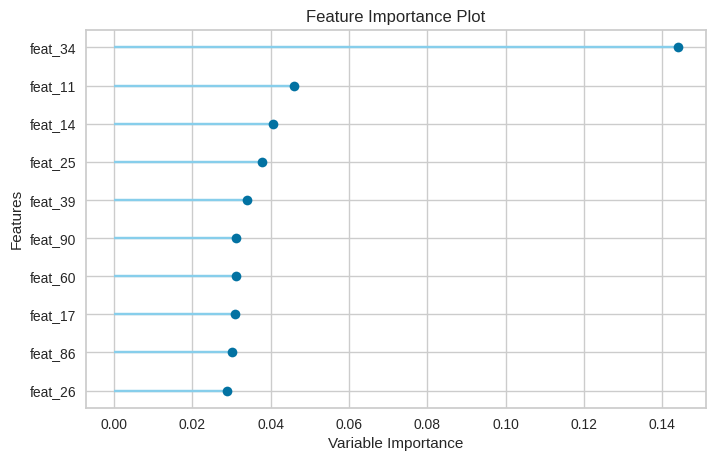

In [10]:
plot_model(tuned_model, plot='feature')

### Model visualization and interpretation

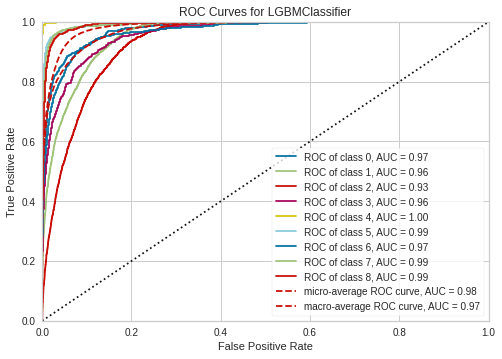

In [15]:
plot_model(tuned_model)

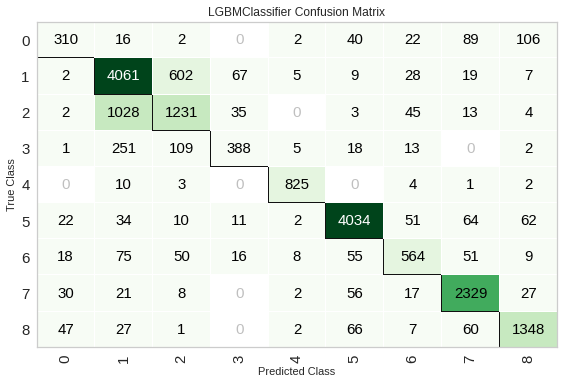

In [16]:
plot_model(tuned_model, 'confusion_matrix')

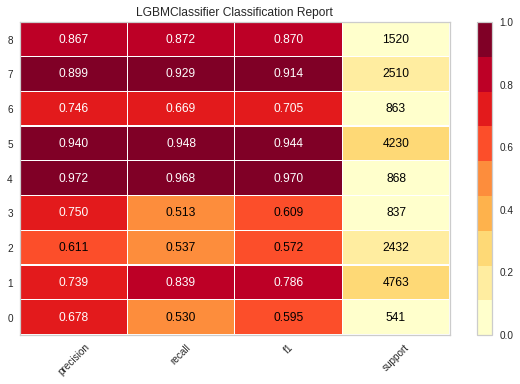

In [43]:
plot_model(tuned_model, 'class_report')

### Model interpretation with SHAP

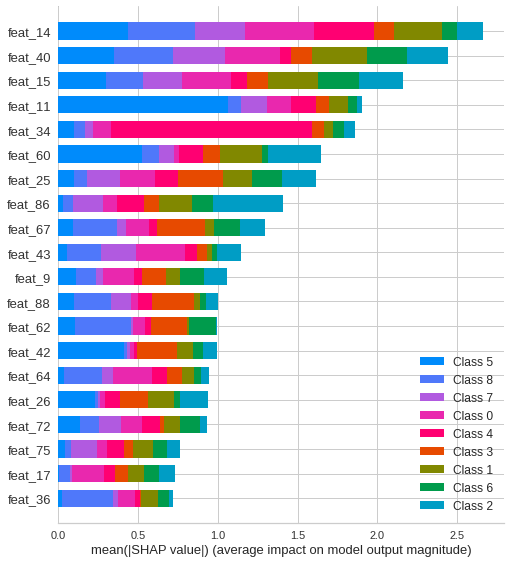

In [18]:
interpret_model(tuned_model)

### Predictions

In [11]:
predictions = predict_model(tuned_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.6586,0.9241,0.6272,0.6793,0.6614,0.5947,0.5968


### Model saving and loading

In [20]:
final_model = finalize_model(tuned_model)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [21]:
save_model(final_model, 'otto_Group_LGB')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='target',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rate=0.1, max_depth=-1,
                                 min_child_samples=20,

In [22]:
model = load_model('otto_Group_LGB')

Transformation Pipeline and Model Successfully Loaded
